In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [221]:
Matches=pd.read_csv("matches.csv")

In [222]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?# 

In [223]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [224]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [225]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


# # 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [226]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# # It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

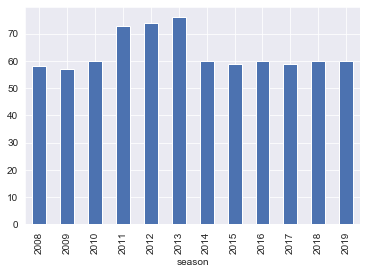

In [227]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [228]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [229]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.# 

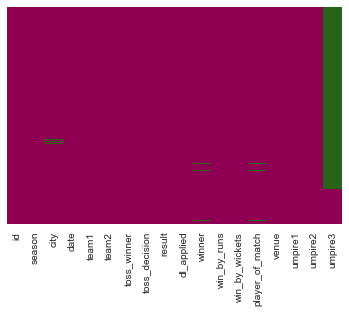

In [230]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [231]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# Removed the columns containing more missing values and have less impact on the predicting matches
# 

In [232]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [233]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


# No missing values are there(well some small amount are still there but will not have impact on Today's match)# 

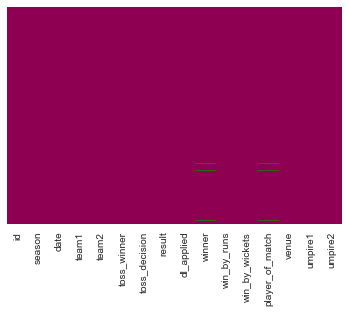

In [234]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between Srh and csk.so we only want information between the matches that take place between them# 

In [235]:
Srh_Csk1=Matches.loc[(Matches['team1']=='Chennai Super Kings')&(Matches['team2'] =='Sunrisers Hyderabad')]
Srh_Csk1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
434,435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
506,507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
655,7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",Anil Chaudhary,Vineet Kulkarni,Nigel Llong
728,11324,2019,Hyderabad,17/04/19,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,Ian Gould,Ulhas Gandhe,C Shamshuddin


In [236]:
Srh_Csk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 434 to 728
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5 non-null      int64 
 1   season           5 non-null      int64 
 2   city             5 non-null      object
 3   date             5 non-null      object
 4   team1            5 non-null      object
 5   team2            5 non-null      object
 6   toss_winner      5 non-null      object
 7   toss_decision    5 non-null      object
 8   result           5 non-null      object
 9   dl_applied       5 non-null      int64 
 10  winner           5 non-null      object
 11  win_by_runs      5 non-null      int64 
 12  win_by_wickets   5 non-null      int64 
 13  player_of_match  5 non-null      object
 14  venue            5 non-null      object
 15  umpire1          5 non-null      object
 16  umpire2          5 non-null      object
 17  umpire3          2 non-null      ob

In [237]:
Srh_Csk2=Matches.loc[(Matches['team2']=='Chennai Super Kings')&(Matches['team1'] =='Sunrisers Hyderabad')]
Srh_Csk2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
473,474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN
550,551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,K Srinivasan,NaN
681,7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon
736,11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SR Watson,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni


In [238]:
Srh_Csk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 413 to 736
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7 non-null      int64 
 1   season           7 non-null      int64 
 2   city             7 non-null      object
 3   date             7 non-null      object
 4   team1            7 non-null      object
 5   team2            7 non-null      object
 6   toss_winner      7 non-null      object
 7   toss_decision    7 non-null      object
 8   result           7 non-null      object
 9   dl_applied       7 non-null      int64 
 10  winner           7 non-null      object
 11  win_by_runs      7 non-null      int64 
 12  win_by_wickets   7 non-null      int64 
 13  player_of_match  7 non-null      object
 14  venue            7 non-null      object
 15  umpire1          7 non-null      object
 16  umpire2          7 non-null      object
 17  umpire3          4 non-null      ob

In [239]:
SRH_CSK=Srh_Csk1.append(Srh_Csk2)
SRH_CSK

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
434,435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
506,507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
655,7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",Anil Chaudhary,Vineet Kulkarni,Nigel Llong
728,11324,2019,Hyderabad,17/04/19,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,Ian Gould,Ulhas Gandhe,C Shamshuddin
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
473,474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN
550,551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,K Srinivasan,NaN
681,7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi


# Complete details of matches that takes placed between SRH and CSK

In [240]:
SRH_CSK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 434 to 736
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               12 non-null     int64 
 1   season           12 non-null     int64 
 2   city             12 non-null     object
 3   date             12 non-null     object
 4   team1            12 non-null     object
 5   team2            12 non-null     object
 6   toss_winner      12 non-null     object
 7   toss_decision    12 non-null     object
 8   result           12 non-null     object
 9   dl_applied       12 non-null     int64 
 10  winner           12 non-null     object
 11  win_by_runs      12 non-null     int64 
 12  win_by_wickets   12 non-null     int64 
 13  player_of_match  12 non-null     object
 14  venue            12 non-null     object
 15  umpire1          12 non-null     object
 16  umpire2          12 non-null     object
 17  umpire3          6 non-null      o

In [241]:
print("No of matches that takes place between SRH and CSK:",len(SRH_CSK))

No of matches that takes place between SRH and CSK: 12


# # Below plot gives the details of the match that takes place between csk and srh

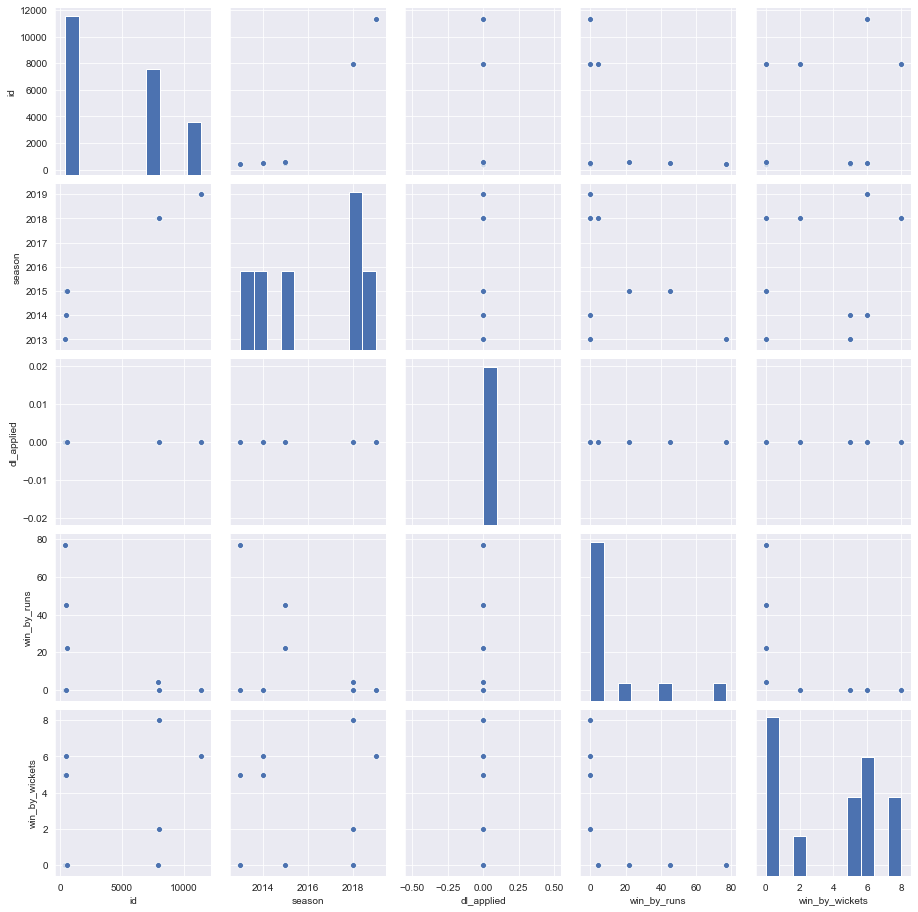

In [242]:
sns.pairplot(data=SRH_CSK)

# It looks like  7 Times CSK won the Toss and 5 Times SRH won the Toss

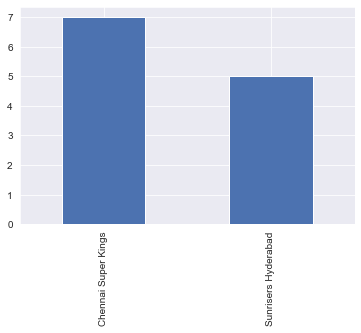

In [243]:
SRH_CSK['toss_winner'].value_counts().plot(kind='bar')

#  CSK went on to win the match 6 times when they decided to  field first and 3 times on batting first .so total it is (CSK=won-9,loss-3)whereas for SRH they won the match 2 times by fielding first and won 1 time by batting first.so it is (SRH=won-3,loss=9)

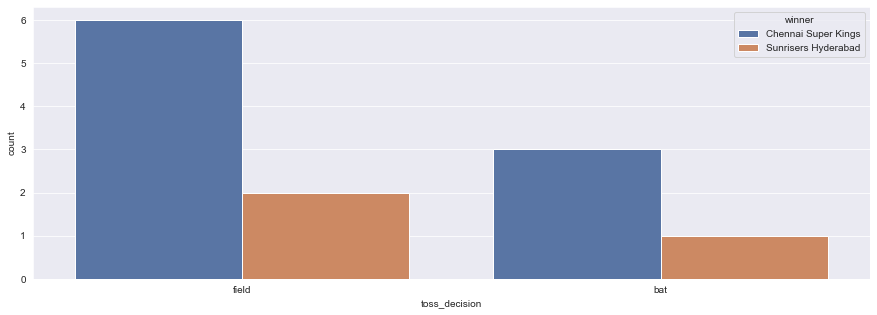

In [244]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue="winner",data=SRH_CSK)

# From the below plot it clearly shows that csk won all the matches when they won the toss(9 times csk won the toss and went onto win match)and same goes for SRH(They win 3 games against csk only when they had won the toss)


# So Toss plays a huge role in deciding the winner

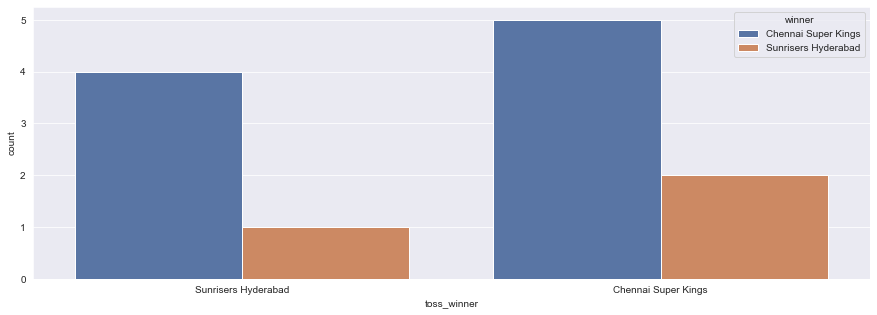

In [245]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=SRH_CSK)

In [246]:
print("No of times toss won by both teams:")
SRH_CSK['toss_winner'].value_counts()

No of times toss won by both teams:


Chennai Super Kings    7
Sunrisers Hyderabad    5
Name: toss_winner, dtype: int64

# Now let gets into the Deliveries Dataset

In [247]:
Deliveries=pd.read_csv("deliveries.csv")

In [248]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [249]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Filtering the match details that only takes place between Chennai Super Kings and Sunrises Hyderabad 

In [250]:
Srh_Csk1=Deliveries.loc[(Deliveries['batting_team' ] =='Chennai Super Kings' ) & (Deliveries['bowling_team'] == 'Sunrisers Hyderabad')]

In [251]:
Srh_Csk1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174689,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,1,AT Rayudu,KM Jadhav,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174690,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,2,KM Jadhav,AT Rayudu,S Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174691,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,3,KM Jadhav,AT Rayudu,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174692,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,4,AT Rayudu,KM Jadhav,S Sharma,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,V Shankar


In [252]:
Srh_Csk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 98083 to 174693
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          1456 non-null   int64 
 1   inning            1456 non-null   int64 
 2   batting_team      1456 non-null   object
 3   bowling_team      1456 non-null   object
 4   over              1456 non-null   int64 
 5   ball              1456 non-null   int64 
 6   batsman           1456 non-null   object
 7   non_striker       1456 non-null   object
 8   bowler            1456 non-null   object
 9   is_super_over     1456 non-null   int64 
 10  wide_runs         1456 non-null   int64 
 11  bye_runs          1456 non-null   int64 
 12  legbye_runs       1456 non-null   int64 
 13  noball_runs       1456 non-null   int64 
 14  penalty_runs      1456 non-null   int64 
 15  batsman_runs      1456 non-null   int64 
 16  extra_runs        1456 non-null   int64 
 17  total_ru

In [253]:
Srh_Csk2=Deliveries.loc[(Deliveries['bowling_team' ] =='Chennai Super Kings' ) & (Deliveries['batting_team'] == 'Sunrisers Hyderabad')]

In [254]:
Srh_Csk2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
97960,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,1,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97961,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,2,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,3,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,Q de Kock,caught,M Vijay
97963,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,4,GH Vihari,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97964,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,5,GH Vihari,S Dhawan,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174568,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,2,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174569,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,3,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174570,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,4,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174571,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,5,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [255]:
Srh_Csk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 97960 to 174572
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          1474 non-null   int64 
 1   inning            1474 non-null   int64 
 2   batting_team      1474 non-null   object
 3   bowling_team      1474 non-null   object
 4   over              1474 non-null   int64 
 5   ball              1474 non-null   int64 
 6   batsman           1474 non-null   object
 7   non_striker       1474 non-null   object
 8   bowler            1474 non-null   object
 9   is_super_over     1474 non-null   int64 
 10  wide_runs         1474 non-null   int64 
 11  bye_runs          1474 non-null   int64 
 12  legbye_runs       1474 non-null   int64 
 13  noball_runs       1474 non-null   int64 
 14  penalty_runs      1474 non-null   int64 
 15  batsman_runs      1474 non-null   int64 
 16  extra_runs        1474 non-null   int64 
 17  total_ru

In [256]:
Srh_Csk=Srh_Csk1.append(Srh_Csk2)

In [257]:
Srh_Csk

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174568,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,2,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174569,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,3,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174570,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,4,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174571,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,5,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [258]:
Srh_Csk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 98083 to 174572
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          2930 non-null   int64 
 1   inning            2930 non-null   int64 
 2   batting_team      2930 non-null   object
 3   bowling_team      2930 non-null   object
 4   over              2930 non-null   int64 
 5   ball              2930 non-null   int64 
 6   batsman           2930 non-null   object
 7   non_striker       2930 non-null   object
 8   bowler            2930 non-null   object
 9   is_super_over     2930 non-null   int64 
 10  wide_runs         2930 non-null   int64 
 11  bye_runs          2930 non-null   int64 
 12  legbye_runs       2930 non-null   int64 
 13  noball_runs       2930 non-null   int64 
 14  penalty_runs      2930 non-null   int64 
 15  batsman_runs      2930 non-null   int64 
 16  extra_runs        2930 non-null   int64 
 17  total_ru

# # From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

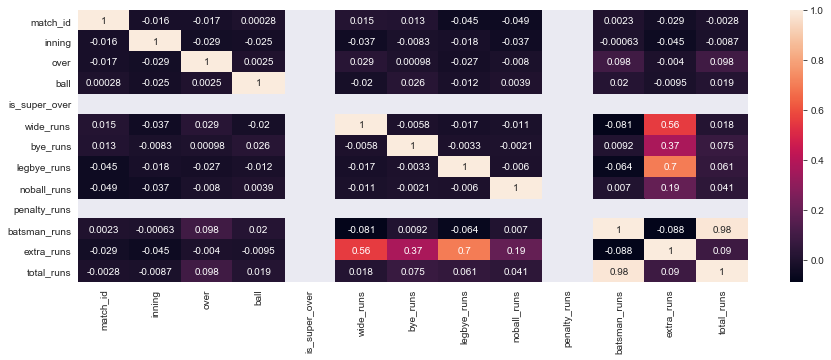

In [306]:
sns.heatmap(Srh_Csk.corr(),annot=True,yticklabels=True)

# How many wides will be bowled in today's match?Let's see what we can predict it by using the dataset

In [259]:
Wides_bowled=Srh_Csk["wide_runs"]

In [260]:
Wides_bowled.value_counts()

0    2844
1      85
2       1
Name: wide_runs, dtype: int64

In [261]:
Wides_bowled.mean()

0.029692832764505118

In [262]:
Wides_bowled.max()

2

In [263]:
Wides_bowled.min()

0

In [264]:
Wides_bowled.median()

0.0

# considering the wides bowled on innings wise .we can see that it's verly less runs were scored on wides when these two sides faced off each other.

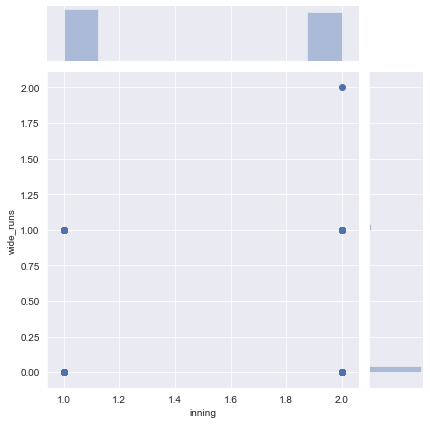

In [265]:
sns.jointplot(x='inning',y='wide_runs',data=Srh_Csk)

# How many runs will warner score?


In [266]:
Warner_scores=Srh_Csk.loc[(Srh_Csk['batsman']=='DA Warner')]

In [267]:
Warner_scores

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
112196,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,3,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
112197,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,4,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,DA Warner,lbw,NaN
120256,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,1,DA Warner,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
120257,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,2,DA Warner,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
120258,507,2,Sunrisers Hyderabad,Chennai Super Kings,1,3,DA Warner,S Dhawan,MM Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174527,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,3,DA Warner,MK Pandey,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174529,11332,1,Sunrisers Hyderabad,Chennai Super Kings,13,5,DA Warner,MK Pandey,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174531,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,1,DA Warner,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174532,11332,1,Sunrisers Hyderabad,Chennai Super Kings,14,2,DA Warner,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [268]:
Warner_scores.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
112196,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,3,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
112197,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,4,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,DA Warner,lbw,NaN


In [271]:
Warner_scores.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
112196,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,3,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
112197,474,1,Sunrisers Hyderabad,Chennai Super Kings,3,4,DA Warner,AJ Finch,BW Hilfenhaus,0,...,0,0,0,0,0,0,0,DA Warner,lbw,NaN


# Warner scored a total of 314 runs against csk

In [272]:
Warner_scores['batsman_runs'].sum()

314

In [273]:
Warner_scores['inning'].value_counts()

2    115
1     77
Name: inning, dtype: int64

In [274]:
Warner_scored_314runs_from_x_matches=Warner_scores['match_id'].value_counts()

# By using the match_id we can calculate his number of matches he played against csk

In [275]:
Warner_scored_314runs_from_x_matches

11332    47
507      46
521      43
551      28
11324    26
474       2
Name: match_id, dtype: int64

# Warner scored 314 runs from his 6 matches against csk

In [276]:
Warner_Average_score=314/6

In [277]:
Warner_Average_score

52.333333333333336

# Warner is good against  bowlers(jadeja,chahar,Thakur) currently playing in csk.He went to hit Fours(4s)and Sixes(6)in jadeja's over(look at the dot(outlier's) in jadeja's area(x-axis)and a maximum of 4's were also scored against chahar and Thakur.

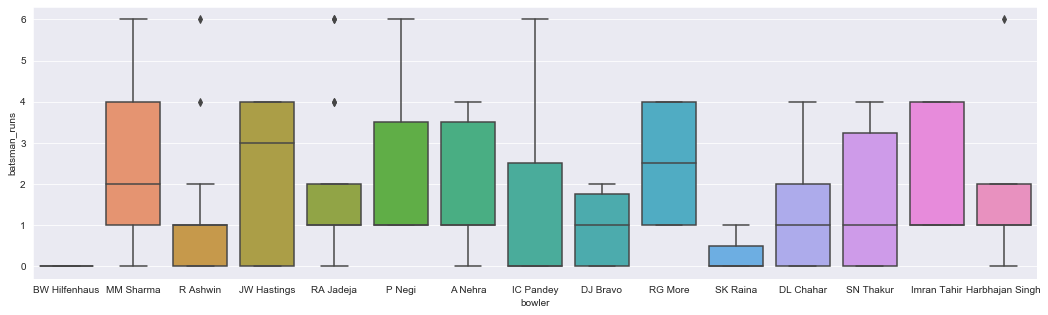

In [288]:
plt.figure(figsize=(18,5))
sns.boxplot(x='bowler',y='batsman_runs',data=Warner_scores)

#  Warner ball by ball runs against csk bowlers over the years

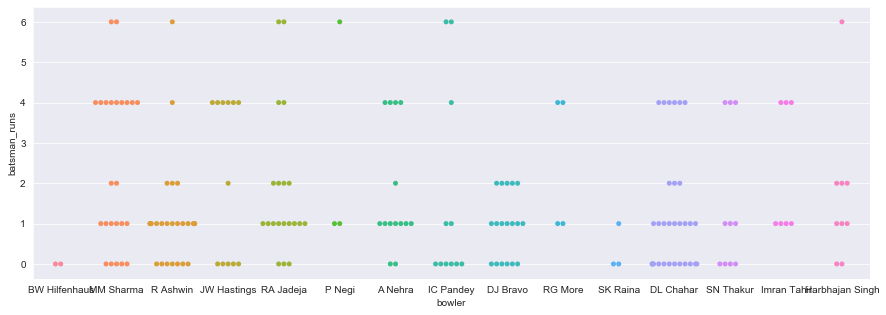

In [325]:
sns.swarmplot(x='bowler',y='batsman_runs',data=Warner_scores)

# How many wickets will csk lose in this match?

In [323]:
Csk_wickets=Srh_Csk1.copy()

In [324]:
Csk_wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174689,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,1,AT Rayudu,KM Jadhav,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174690,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,2,KM Jadhav,AT Rayudu,S Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174691,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,3,KM Jadhav,AT Rayudu,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174692,11332,2,Chennai Super Kings,Sunrisers Hyderabad,20,4,AT Rayudu,KM Jadhav,S Sharma,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,V Shankar


# Removed  null values to get the wickets details

In [299]:
Csk_wickets.dropna(inplace=True)

In [300]:
Csk_wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98130,414,2,Chennai Super Kings,Sunrisers Hyderabad,8,3,M Vijay,MEK Hussey,A Mishra,0,...,0,0,0,0,0,0,0,M Vijay,stumped,Q de Kock
98141,414,2,Chennai Super Kings,Sunrisers Hyderabad,10,2,MEK Hussey,SK Raina,A Mishra,0,...,0,0,0,0,0,0,0,MEK Hussey,caught,Q de Kock
98165,414,2,Chennai Super Kings,Sunrisers Hyderabad,14,2,SK Raina,MS Dhoni,A Mishra,0,...,0,0,0,0,0,0,0,SK Raina,caught,DJG Sammy
98190,414,2,Chennai Super Kings,Sunrisers Hyderabad,18,2,DJ Bravo,MS Dhoni,I Sharma,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,A Ashish Reddy
98199,414,2,Chennai Super Kings,Sunrisers Hyderabad,19,5,RA Jadeja,MS Dhoni,DW Steyn,0,...,0,0,0,0,0,0,0,RA Jadeja,caught,A Mishra
103008,435,1,Chennai Super Kings,Sunrisers Hyderabad,6,2,M Vijay,MEK Hussey,NLTC Perera,0,...,0,0,0,0,0,0,0,M Vijay,caught,PA Patel
103087,435,1,Chennai Super Kings,Sunrisers Hyderabad,18,5,MS Dhoni,SK Raina,NLTC Perera,0,...,0,0,0,0,0,0,0,MS Dhoni,caught,KV Sharma
112388,474,2,Chennai Super Kings,Sunrisers Hyderabad,14,6,SK Raina,DR Smith,I Sharma,0,...,0,0,0,0,0,0,0,SK Raina,caught,Y Venugopal Rao
112397,474,2,Chennai Super Kings,Sunrisers Hyderabad,16,3,DR Smith,MS Dhoni,B Kumar,0,...,0,0,0,0,0,0,0,DR Smith,caught,DA Warner
112399,474,2,Chennai Super Kings,Sunrisers Hyderabad,16,5,F du Plessis,MS Dhoni,B Kumar,0,...,0,0,0,0,0,0,0,F du Plessis,caught,KL Rahul


# Csk batsmen threw their wickets in  the below mentioned ways 

In [301]:
Csk_wickets['dismissal_kind'].value_counts()

caught     25
run out     9
stumped     3
Name: dismissal_kind, dtype: int64

# csk lost a total of 37 wickets from 12 matches against SRH

In [305]:
Csk_wickets['match_id'].value_counts()

414      5
7950     5
521      4
11332    4
7913     3
551      3
474      3
11324    2
507      2
435      2
7953     2
7939     2
Name: match_id, dtype: int64

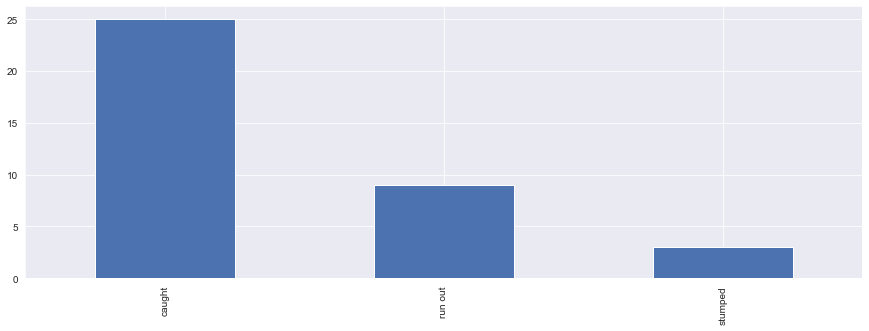

In [303]:
Csk_wickets['dismissal_kind'].value_counts().plot(kind='bar')

In [309]:
Csk_wickets_avg=37//12

In [310]:
print("Csk wickets lost per match:",Csk_wickets_avg)

Csk wickets lost per match: 3


# How many runs ll be scored totally in this match?

In [311]:
Srh_Csk

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
98083,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,1,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98084,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,2,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98085,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,3,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
98086,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,4,M Vijay,MEK Hussey,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98087,414,2,Chennai Super Kings,Sunrisers Hyderabad,1,5,MEK Hussey,M Vijay,DJG Sammy,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174568,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,2,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174569,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,3,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174570,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,4,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
174571,11332,1,Sunrisers Hyderabad,Chennai Super Kings,20,5,YK Pathan,MK Pandey,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [312]:
Srh_Csk['total_runs'].value_counts()

1    1188
0     973
4     347
2     234
6     171
3      12
5       3
7       1
8       1
Name: total_runs, dtype: int64

# Both Csk and Srh scored a Total of 4136 runs from 12 matches

In [314]:
Total=Srh_Csk['total_runs'].sum()

In [317]:
print("Both Csk and Srh scored a Total of {} runs from 12 matches".format(Total))

Both Csk and Srh scored a Total of 4136 runs from 12 matches


In [318]:
Average_Total_Score_of_Srh_Csk=Total//12

In [319]:
print("Their Average total score was",Average_Total_Score_of_Srh_Csk)

Their Average total score was 344


#  We can predict the match results from this analysis but current form of team and its players and toss plays an huge role in predicting the winner in this match.Those who won the toss ll have more chance to win the Game.